# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# importing the dataset

In [2]:
data = pd.read_csv("D:\\Kaggle - (USA) house price prediction\\kc_house_data_NaN.csv")

In [3]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
print(data.shape)

(21613, 22)


# datatypes of each column

In [6]:
print(data.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Statistical summary for the dataframe

In [7]:
data.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.describe(include="all")

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  int64  
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

# Data Preprossesing

In [10]:
# drop the Unnamed & id column to avoid the wrong calculations. and there is no meaning of finding statistical summaries for an Unnamed & ID.

In [11]:
data.drop(["Unnamed: 0", "id"] , axis=1, inplace=True)

In [12]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# - identifying missing values

In [14]:
data.isnull().any()

date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [15]:
# only bedrooms and bathrooms have missing values.

In [16]:
# count the missing values (Nan = Not a number)

In [17]:
print("number of Nan for bedrooms: ", data["bedrooms"].isnull().sum())
print("number of Nan for bathrooms: ", data["bathrooms"].isnull().sum())

number of Nan for bedrooms:  13
number of Nan for bathrooms:  10


In [18]:
# replace these missing values using the mean values of them

In [19]:
mean_bedrooms = data["bedrooms"].mean()
data["bedrooms"].replace(np.nan, mean_bedrooms, inplace=True)

In [20]:
mean_bathrooms = data["bathrooms"].mean()
data["bathrooms"].replace(np.nan, mean_bathrooms, inplace=True)

In [21]:
print("number of Nan for bedrooms: ", data["bedrooms"].isnull().sum())
print("number of Nan for bathrooms: ", data["bathrooms"].isnull().sum())

number of Nan for bedrooms:  0
number of Nan for bathrooms:  0


In [22]:
data.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [23]:
# now, there are no missing values in the dataframe.

# - correct data format

In [24]:
data.dtypes

date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [25]:
# to see each unique values of zipcode
# beause think that the zipcode should be strings
data.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [26]:
# all zipcode values in int type. therefore it should not be string

In [27]:
# bedrooms, bathrooms, floors floats should be float --> int format

In [28]:
data[["bedrooms", "bathrooms", "floors"]] = data[["bedrooms", "bathrooms", "floors"]].astype(int)

In [29]:
data.dtypes

date              object
price              int64
bedrooms           int32
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [30]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850,3,1,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# - some feature engineerings

In [31]:
# how many zeros in yr_renovated column

data["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
data.shape

(21613, 20)

In [33]:
(20699/21613)*100

95.77106371165502

In [34]:
# among all of the values, 95.77106371165502 % values are zeros.
# therefore year of rennoated column convert to a column saying that a house is renovated or not.
# If a house is renovated, it gives 1 and if a house is not renovated it gives 0 .

In [35]:
data["renovated"] = data["yr_renovated"].apply(lambda yr: 0 if yr==0 else 1)

In [36]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,20141013T000000,221900,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,20141209T000000,538000,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,20150225T000000,180000,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,20141209T000000,604000,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,20150218T000000,510000,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [37]:
data.drop("yr_renovated", axis=1, inplace=True)

In [38]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,20141209T000000,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0
5,20140512T000000,1225000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,98053,47.6561,-122.005,4760,101930,0
6,20140627T000000,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,98003,47.3097,-122.327,2238,6819,0
7,20150115T000000,291850,3,1,1060,9711,1,0,0,3,7,1060,0,1963,98198,47.4095,-122.315,1650,9711,0
8,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,98146,47.5123,-122.337,1780,8113,0
9,20150312T000000,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,98038,47.3684,-122.031,2390,7570,0


In [39]:
data.shape

(21613, 20)

# Exploratoray data analysis

to see what are the important variables to building the model

In [40]:
print(data.dtypes)

date              object
price              int64
bedrooms           int32
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
renovated          int64
dtype: object


In [41]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
price,1.000000,0.308868,0.510413,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,-0.053203,0.307003,0.021626,0.585379,0.082447,0.126092
bedrooms,0.308868,1.000000,0.465558,0.578147,0.032253,0.157938,-0.006778,0.080031,0.026898,0.356770,0.479287,0.303001,0.155635,-0.153678,-0.009650,0.130862,0.393319,0.030310,0.018216
bathrooms,0.510413,0.465558,1.000000,0.698165,0.085455,0.486026,0.058764,0.177758,-0.127166,0.605957,0.640527,0.250373,0.434213,-0.160569,0.031026,0.181058,0.510545,0.081092,0.059801
sqft_living,0.702035,0.578147,0.698165,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,-0.199430,0.052529,0.240223,0.756420,0.183286,0.055094
sqft_lot,0.089661,0.032253,0.085455,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.007745
floors,0.237211,0.157938,0.486026,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.096743,0.029567,0.159001,0.296561,-0.013252,-0.007848
waterfront,0.266369,-0.006778,0.058764,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.093294
view,0.397293,0.080031,0.177758,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.084827,0.006157,-0.078400,0.280439,0.072575,0.104062
condition,0.036362,0.026898,-0.127166,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.060139
grade,0.667434,0.356770,0.605957,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,-0.184862,0.114084,0.198372,0.713202,0.119248,0.014008


<h3>Analysis of price</h3>

<AxesSubplot:xlabel='price', ylabel='Count'>

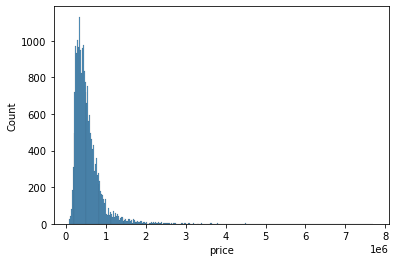

In [42]:
sns.histplot(data=data, x="price")

Distribution of the price of the houses are heavily right skewed. Therefore, majority of the houses have relatively low prices.

# continous numerical variables

contain any value within some range. types are "int" and "float".

variables - sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15

(0.0, 13540.0)

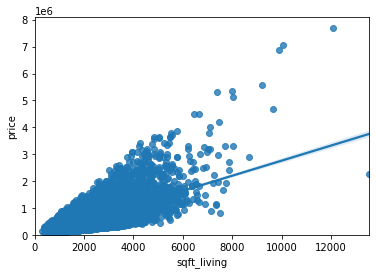

In [43]:
sns.regplot(x="sqft_living", y="price", data=data)
plt.ylim(0,)
plt.xlim(0,)

when sqft_living increasing, price is also increasing. therefore, there is a positive relationship between these 2 variables.

In [44]:
# correlation between sqft_living and price

data[["sqft_living", "price"]].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


correlation = 0.702035. therefore it is a strong posititve relationship. therefore sqft_living potentially be a good predictor of price.

(0.0, 1651359.0)

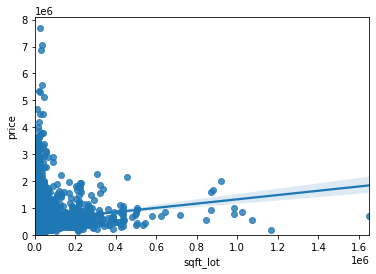

In [45]:
sns.regplot(x="sqft_lot", y="price", data=data)
plt.ylim(0,)
plt.xlim(0,)

sqft_lot is increasing, price is also increasing. there is a somewhat positive relationship between 2 variables.

In [46]:
# correlation--

data[["sqft_lot", "price"]].corr()

,sqft_lot,price
sqft_lot,1.000000,0.089661
price,0.089661,1.000000


correlation = 0.089661. weak relationship between 2 variables. therefore sqft_lot is not a good predictor variable for price

(0.0, 9410.0)

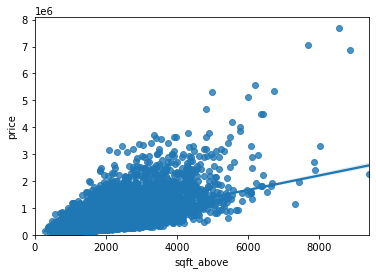

In [47]:
sns.regplot(x="sqft_above", y="price", data=data)
plt.ylim(0,)
plt.xlim(0,)

price is increasing when sqft_above is increased. there is a positive relationship between 2 variables.

In [48]:
# correlation 

data[["sqft_above", "price"]].corr()

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


correlation = 0.605567. there is  strong positive relationship between 2 variables. therefore sqft_above is a good predictor variable of price.

(0.0, 4820.0)

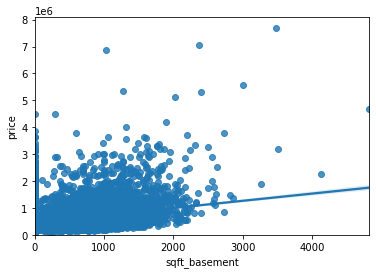

In [49]:
sns.regplot(x="sqft_basement", y="price", data=data)
plt.ylim(0,)
plt.xlim(0,)

price is increasing when sqft_basement is increased. there is a positive relationship between 2 variables.

In [50]:
# correlation

data[["sqft_basement", "price"]].corr()

,sqft_basement,price
sqft_basement,1.000000,0.323816
price,0.323816,1.000000


correlation = 0.323816. there is a weak positive relationship between 2 variables. therefore sqft_basement is not a reliable variable of price.

(0.0, 8081250.0)

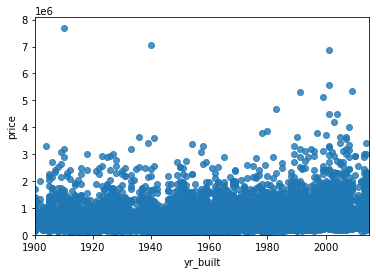

In [51]:
sns.regplot(x="yr_built", y="price", data=data)
plt.ylim(0,)

seems like no relationship between 2 variables. 

In [52]:
# correlation

data[["yr_built", "price"]].corr()

,yr_built,price
yr_built,1.000000,0.054012
price,0.054012,1.000000


correlation = 0.054012. there is a weak relationship between 2 variables. therefore yr_built is not a reliable variable of price.

(0.0, 8081250.0)

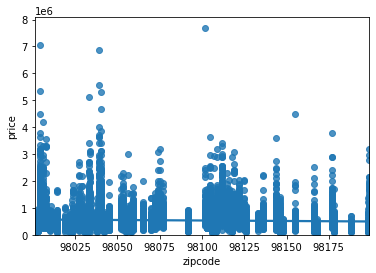

In [53]:
sns.regplot(x="zipcode", y="price", data=data)
plt.ylim(0,)

seems like no relationship between 2 variables.

In [54]:
data[["zipcode", "price"]].corr()

,zipcode,price
zipcode,1.000000,-0.053203
price,-0.053203,1.000000


correlation = 0.053203. there is a weak relationship between 2 variables. therefore zipcode is not a reliable variable of price.

(0.0, 8081250.0)

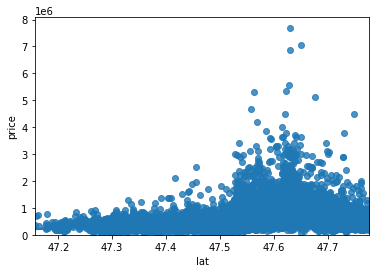

In [55]:
sns.regplot(x="lat", y="price", data=data)
plt.ylim(0,)

seems like no relationship between 2 variables.

In [56]:
data[["lat", "price"]].corr()

,lat,price
lat,1.000000,0.307003
price,0.307003,1.000000


correlation = 0.307003. there is a weak relationship between 2 variables. therefore lat is not a reliable variable of price.

(0.0, 8081250.0)

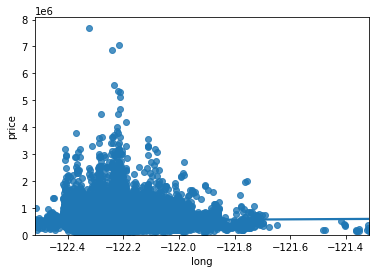

In [57]:
sns.regplot(x="long", y="price", data=data)
plt.ylim(0,)

seems like no relationship between 2 variables.

In [58]:
data[["long", "price"]].corr()

,long,price
long,1.000000,0.021626
price,0.021626,1.000000


correlation = 0.021626. there is a weak relationship between 2 variables. therefore long is not a reliable variable of price.

(0.0, 8083624.665417921)

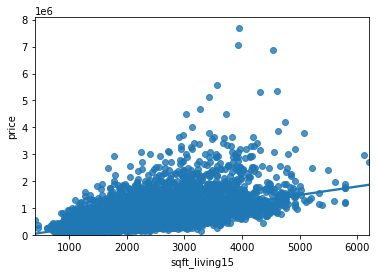

In [59]:
sns.regplot(x="sqft_living15", y="price", data=data)
plt.ylim(0,)

price is increasing when sqft_living15 is increased. there is a positive relationship between 2 variables.

In [60]:
data[["sqft_living15", "price"]].corr()

,sqft_living15,price
sqft_living15,1.000000,0.585379
price,0.585379,1.000000


correlation = 0.585379. there is positive relationship between 2 variables. therefore sqft_living15 is a good predictor variable of price.

(0.0, 8081250.0)

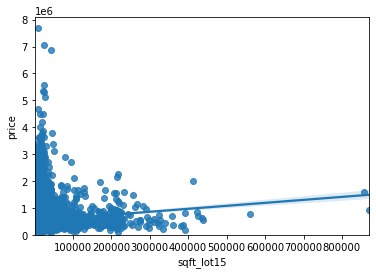

In [61]:
sns.regplot(x="sqft_lot15", y="price", data=data)
plt.ylim(0,)

price is increasing when sqft_lot15 is increased. but data points are scattered around the fitted line. there is a weak positive relationship between 2 variables.

In [62]:
data[["sqft_lot15", "price"]].corr()

,sqft_lot15,price
sqft_lot15,1.000000,0.082447
price,0.082447,1.000000


correlation = 0.082447. there is weak relationship between 2 variables. therefore sqft_lot15 is a not a reliable variable of price.

# sqft_living, sqft_above, sqft_living15 are good predictor numerical variables of price. we can fit a model using these variables.

between sqft_living and price have highiest correlation. (0.702035)

In [63]:
data.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
renovated        0.126092
floors           0.237211
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.510413
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# categorical variables

characteristic of a data unit. from small groups. types - object, int

categorical variables - bedrooms, bathrooms, floors, waterfront, view, condition, grade, renovated

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

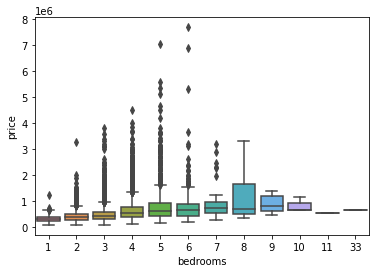

In [64]:
sns.boxplot(x="bedrooms", y="price", data=data)

different "bedrooms" groups have a significant overlap. therefore, bedrooms would not be a good predictor of price.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

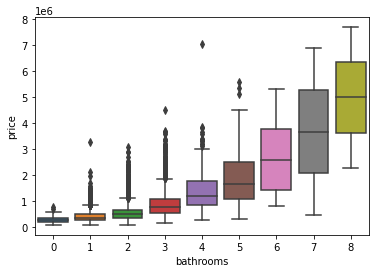

In [65]:
sns.boxplot(x="bathrooms", y="price", data=data)

distribution of price between different groups of bathrooms are distinct. so, "bathrooms" is a good predictor of price.

<AxesSubplot:xlabel='floors', ylabel='price'>

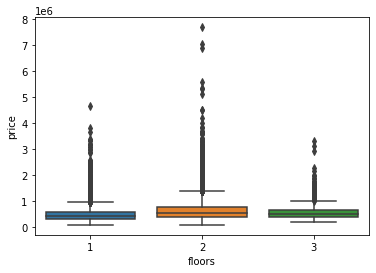

In [66]:
sns.boxplot(x="floors", y="price", data=data)

distribution of price between different groups of floors are not distinct. so, "floors" is not a good predictor of price.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

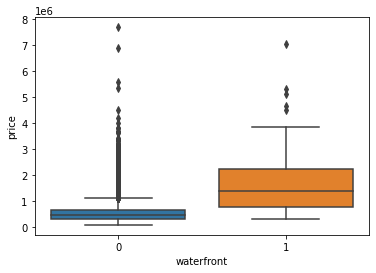

In [67]:
sns.boxplot(x="waterfront", y="price", data=data)

distribution of price between 2 groups of waterfront are distinct. so, "waterfront" is a good predictor of price.

<AxesSubplot:xlabel='view', ylabel='price'>

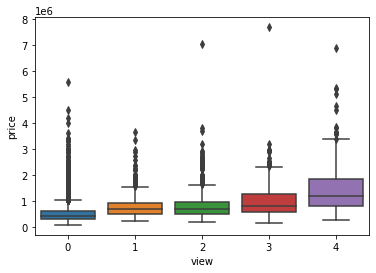

In [68]:
sns.boxplot(x="view", y="price", data=data)

distribution of price between groups of view have a significant overlap. therefore, "view" would not be a good predictor of price.

<AxesSubplot:xlabel='condition', ylabel='price'>

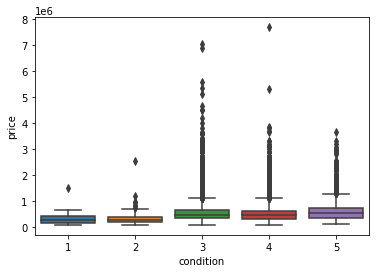

In [69]:
sns.boxplot(x="condition", y="price", data=data)

distribution of price between groups of condition have a significant overlap. therefore, "condition" would not be a good predictor of price.

<AxesSubplot:xlabel='grade', ylabel='price'>

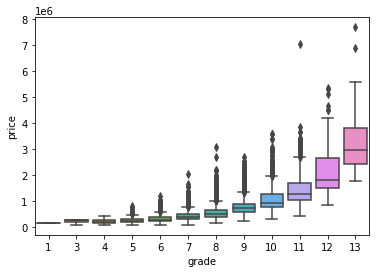

In [70]:
sns.boxplot(x="grade", y="price", data=data)

distribution of price between different groups of grade are distinct. so, "grade" is a good predictor of price.

<AxesSubplot:xlabel='renovated', ylabel='price'>

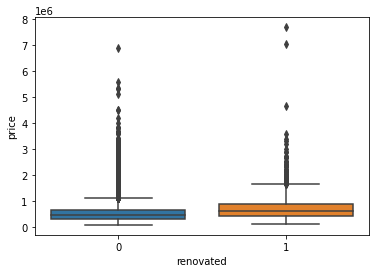

In [71]:
sns.boxplot(x="renovated", y="price", data=data)

distribution of price between different groups of "renovated" have a significant overlap. therefore, "renovated" would not be a good predictor of price.

# good predictor variables of price

Numerical - (sqft_living, sqft_above, sqft_living15)  Categorical - (bathrooms, waterfront, grade)

In [72]:
#-------------------  (no need)

# Statistically signifinace of highly correlated numerical variables

In [73]:
#sqft_living---

pearson_coef, p_val = stats.pearsonr(data['sqft_living'], data['price'])
print("The Pearson Correlation Coefficient of sqft_living is", pearson_coef, " with a P-value of P =", p_val)  

The Pearson Correlation Coefficient of sqft_living is 0.7020350546118  with a P-value of P = 0.0


Since the p-value is  <  0.001, the correlation between "sqft_living" and price is statistically significant, and the linear relationship is quite strong (~0.7020).

In [74]:
#sqft_above---

pearson_coef, p_val = stats.pearsonr(data['sqft_above'], data['price'])
print("The Pearson Correlation Coefficient of sqft_above is", pearson_coef, " with a P-value of P =", p_val)   

The Pearson Correlation Coefficient of sqft_above is 0.6055672983560781  with a P-value of P = 0.0


Since the p-value is  <  0.001, the correlation between "sqft_above" and price is statistically significant, and the linear relationship is quite strong (~0.0.6056).

In [75]:
#sqft_living15---

pearson_coef, p_val = stats.pearsonr(data['sqft_living15'], data['price'])
print("The Pearson Correlation Coefficient of sqft_living15 is", pearson_coef, " with a P-value of P =", p_val) 

The Pearson Correlation Coefficient of sqft_living15 is 0.585378903579568  with a P-value of P = 0.0


Since the p-value is < 0.001, the correlation between "sqft_living15" and price is statistically significant, and the linear relationship is quite strong (0.5854).

In [76]:
#---------------

In [77]:
#--------------------

# Remove the multicollinearity

always do this multicollinearity finding on the training data set to prevent the overfiitng

In [78]:
data.dtypes

date              object
price              int64
bedrooms           int32
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
renovated          int64
dtype: object

using only numerical variables, prepare X and Y

In [79]:
X = data.iloc[:, 2:]
Y = data.iloc[:, -1]

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [81]:
corrmatrix = X_train.corr()

In [82]:
corrmatrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
bedrooms,1.000000,0.457673,0.575678,0.030028,0.153492,-0.012975,0.077341,0.025729,0.351555,0.474742,0.300463,0.156597,-0.154674,-0.005957,0.132890,0.389217,0.028202,0.020118
bathrooms,0.457673,1.000000,0.694847,0.084167,0.487261,0.048603,0.170743,-0.133285,0.604271,0.634520,0.248772,0.437611,-0.161769,0.033160,0.181744,0.507055,0.081127,0.061986
sqft_living,0.575678,0.694847,1.000000,0.169755,0.354252,0.094406,0.275740,-0.062370,0.762652,0.873347,0.431785,0.324669,-0.201630,0.052119,0.242511,0.756721,0.182581,0.052060
sqft_lot,0.030028,0.084167,0.169755,1.000000,-0.004842,0.022988,0.076408,-0.006164,0.113279,0.181313,0.012082,0.056313,-0.127299,-0.087776,0.221737,0.137282,0.711000,-0.000626
floors,0.153492,0.487261,0.354252,-0.004842,1.000000,0.018179,0.022038,-0.296433,0.472285,0.521067,-0.239018,0.580908,-0.099348,0.026166,0.160767,0.294657,-0.009093,-0.006750
waterfront,-0.012975,0.048603,0.094406,0.022988,0.018179,1.000000,0.405475,0.022244,0.076539,0.064028,0.074874,-0.029877,0.030284,-0.017128,-0.046261,0.080595,0.030327,0.092698
view,0.077341,0.170743,0.275740,0.076408,0.022038,0.405475,1.000000,0.041975,0.245778,0.159637,0.269383,-0.052338,0.087749,0.001013,-0.078865,0.271152,0.074766,0.103469
condition,0.025729,-0.133285,-0.062370,-0.006164,-0.296433,0.022244,0.041975,1.000000,-0.148915,-0.163880,0.175667,-0.362081,0.004693,-0.019374,-0.108054,-0.094565,-0.002318,-0.058635
grade,0.351555,0.604271,0.762652,0.113279,0.472285,0.076539,0.245778,-0.148915,1.000000,0.755502,0.163678,0.449680,-0.183666,0.113627,0.201783,0.711843,0.119577,0.011289
sqft_above,0.474742,0.634520,0.873347,0.181313,0.521067,0.064028,0.159637,-0.163880,0.755502,1.000000,-0.062254,0.431488,-0.264094,-0.002478,0.347043,0.733110,0.192411,0.020001


<AxesSubplot:>

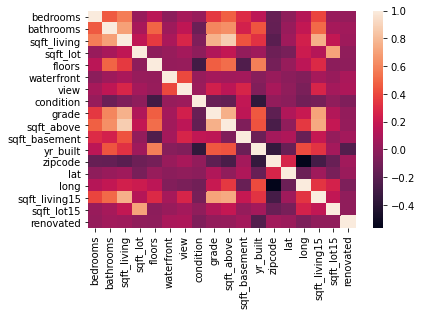

In [83]:
sns.heatmap(corrmatrix)

In [84]:
# if 2 variables have theeshold size amount of correlation, discard 1 variable and choose the other variable.

def correlation(data, threshold):
    correlated_cols = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [85]:
corr_features = correlation(X_train, 0.75)

In [86]:
corr_features

{'grade', 'sqft_above', 'sqft_living15'}

if 2 variables have 75% of correlation, give as the above 3 variables are highly correlated.

<h3> Drop above highly correlated variables from the dataset</h3>

<b>remaining data are (after checking good predictors of price and removing multicollinearity)</b> - Numerical - (sqft_living) Categorical - (bathrooms, waterfront)

# Model Development

# 1. Simple Linear Regression model

In [87]:
lm1 = LinearRegression()
lm1

LinearRegression()

<h4>"sqft_living "</h4> is a highier correalted variable. therefore, I created a simple Linear Regression model using "sqft_living" 

In [88]:
X = data[["sqft_living"]]
Y = data["price"]

linear model using "sqft_living "

In [89]:
lm1.fit(X,Y)

LinearRegression()

we can output a prediction

In [90]:
Yhat = lm1.predict(X)
Yhat[0:5]

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

intercept value (a)

In [91]:
lm1.intercept_

-43580.74309447361

slope value (b)

In [92]:
lm1.coef_

array([280.6235679])

<h4>Final model</h4>
Yhat = a+bx

price = - 43580.74309447361 + 280.6235679*(sqft_living)

# 2. Multiple Linear Regression model

<h3>1.Using all predictor variables excepting eliminated ones ('id', 'data')</h3>

In [93]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [94]:
Z1 = data[['zipcode', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'renovated', 'floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [95]:
lm2.fit(Z1, data['price'])

LinearRegression()

In [96]:
lm2.intercept_

7186659.817764202

In [97]:
lm2.coef_

array([-5.85286204e+02, -2.12030309e+05,  2.72699855e+04, -2.57604482e+03,
       -3.79876181e-01,  1.21881774e-01,  3.85060244e+04,  2.09250382e+03,
        5.85226124e+05,  6.03370348e+05, -3.53845267e+04,  3.86673198e+01,
        5.27027520e+04,  5.12817089e+04,  2.31852168e+01,  6.94830057e+01,
        9.62220818e+04,  1.08150326e+02])

In [98]:
#------------

<h3>2. Using good predictor variables selected by analysing data</h3>

Using above selected good predictor variables- 
sqft_living, sqft_above, sqft_living15, bathrooms, waterfront, grade

In [99]:
Z2 = data[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'waterfront', 'grade']]

Fit the linear model using the above-mentioned variables.

In [100]:
lm3 = LinearRegression()
lm3

LinearRegression()

In [101]:
lm3.fit(Z2, data['price'])

LinearRegression()

intercept(a)

In [102]:
lm3.intercept_

-629078.9916059341

coefficients(b1,b2,b3,b4,b5,b6)

In [103]:
lm3.coef_

array([ 2.13956254e+02, -7.38477805e+01,  2.38793459e+01,  3.88435440e+03,
        8.10266864e+05,  1.03943170e+05])

<h3>final estimated linear model</h3>

price= - 629078.9916059341 + 2.13956254e+02*(sqft_living) - 7.38477805e+01*(sqft_above) + 2.38793459e+01*(sqft_living15) + 3.88435440e+03*(bathrooms) + 8.10266864e+05*(waterfront) + 1.03943170e+05*(grade)

<h3> 3. After removing multicollinearity </h3>

In [104]:
Z3 = data[['sqft_living', 'bathrooms', 'waterfront']]

In [105]:
lm4 = LinearRegression()
lm4

LinearRegression()

In [106]:
lm4.fit(Z3, data['price'])

LinearRegression()

In [107]:
lm4.intercept_

-46155.05728926207

In [108]:
lm4.coef_

array([2.59975413e+02, 2.24149776e+04, 8.32619901e+05])

<h3>final estimated linear model</h3>

price= - 46155.05728926207 + 2.59975413e+02(sqft_living) + 2.24149776e+04(bathrooms) + 8.32619901e+05(waterfront)

<h3>4. removing zipcode(weak correlation and data are highly scattered) and muticollinearity vaeiables ('grade', 'sqft_above', 'sqft_living15)</h3>

zipcode          
grade    
sqft_above   
sqft_living15

In [109]:
Z4 = data[['long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'renovated', 'floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15']]

In [110]:
lm5 = LinearRegression()
lm5

LinearRegression()

In [111]:
lm5.fit(Z4, data['price'])

LinearRegression()

In [112]:
lm5.intercept_

-45640271.31744566

In [113]:
lm5.coef_

array([-1.50689127e+05,  3.61515289e+04, -1.80160121e+03, -2.37278789e-01,
        4.35778560e-01,  7.17245261e+04,  6.96067800e+04,  6.26205953e+05,
        6.38650405e+05,  6.76908399e+02,  6.94276677e+01,  6.07485040e+04,
        1.33129229e+05,  2.19335476e+02])

<h3>final estimated linear model</h3>

price = -45640271.31744566 - 1.50689127e+05*(long) - 3.61515289e+04*(condition) - 1.80160121e+03*(yr_built) - 2.37278789e-01*(sqft_lot15) + 4.35778560e-01*(sqft_lot) + 7.17245261e+04*(renovated) + 6.96067800e+04*(floors) +         6.26205953e+05*(waterfront) + 6.38650405e+05*(lat) + 6.76908399e+02*(bedrooms) + 6.94276677e+01*(sqft_basement) + 6.07485040e+04*(view) + 1.33129229e+05*(bathrooms) + 2.19335476e+02*(sqft_living15)

# Model Evaluation Using Visualization

<h3> Simple linear Regression Model </h3>

<b>regression plot </b>

(0.0, 8084056.250378948)

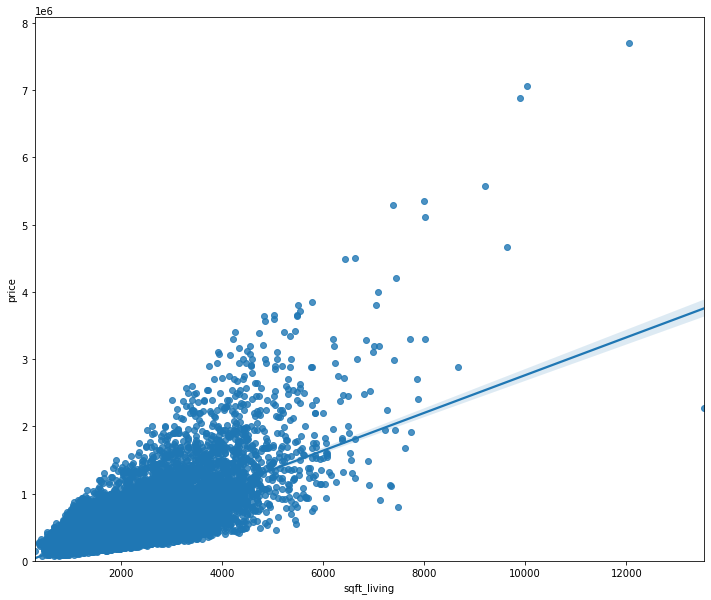

In [114]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='sqft_living', y='price', data=data)
plt.ylim(0,)

there is a positive relationship between sqft_living and price. data points are scattered somewhat closely around the fitted line. therefore, this model is a somewhat best model for this data.

In [115]:
data[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


correlation beetween sqft_living and price is 0.702035. it is somewhat close to 1. therefore it is a somewhat strong relationship.

<b>Residual plot </b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


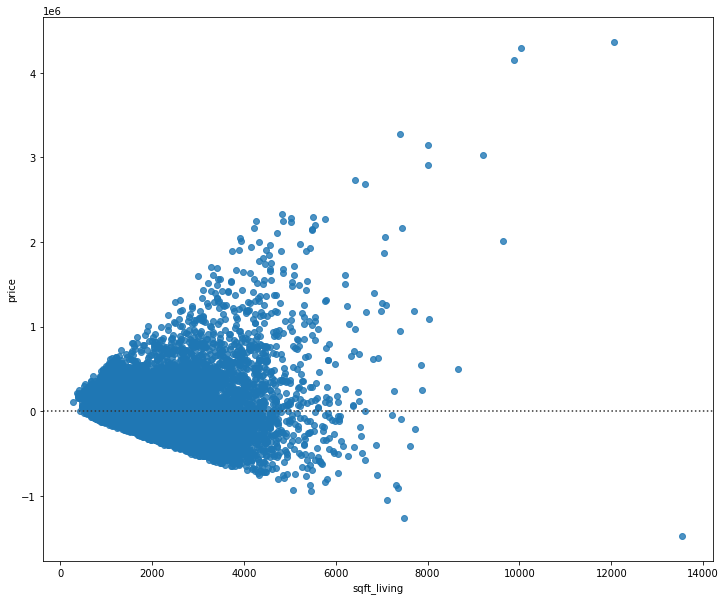

In [116]:
width = 12
height =10
plt.figure(figsize=(width,height))
sns.residplot(data['sqft_living'], data['price'])
plt.show()

there is no constant variance around the x axis. therefore this simple linear regression model is not appropriate for the data.

<h3> Multiple linear Regression Model </h3>

<b>Distribution plot </b>

make a prediction 

<h3>1.Using all predictor variables excepting eliminated ones ('id', 'data')</h3>

In [117]:
Yhat1 = lm2.predict(Z1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


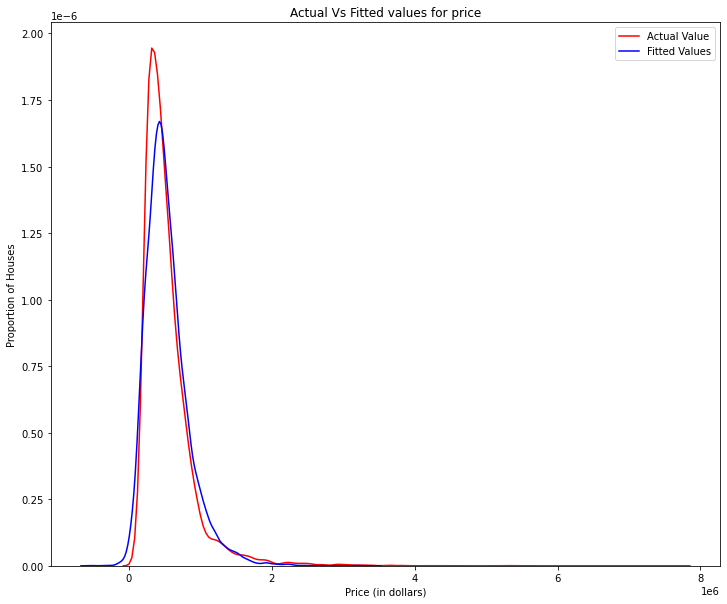

In [118]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat1, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual Vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap in most places.

<h3>2. Using good predictor variables selected by analysing data</h3>

In [119]:
Yhat2 = lm3.predict(Z2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


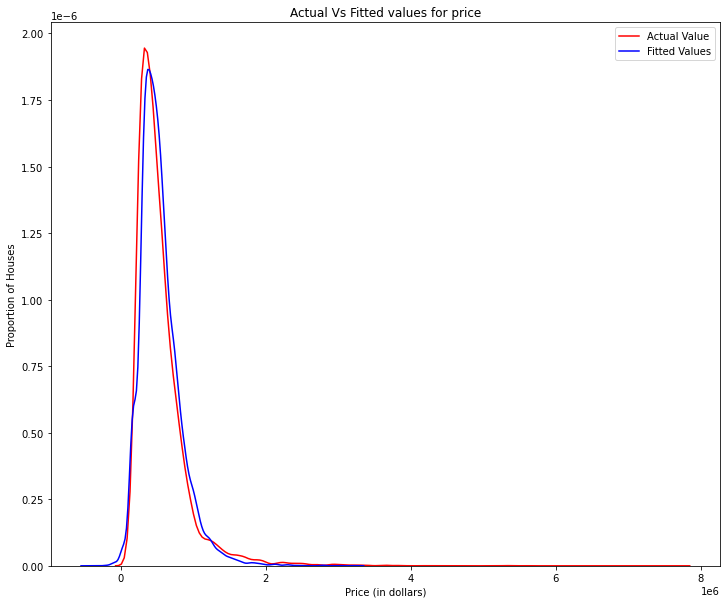

In [120]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat2, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual Vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap in most places.

<h3> 3. After removing multicollinearity </h3>

In [121]:
Yhat3 = lm4.predict(Z3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


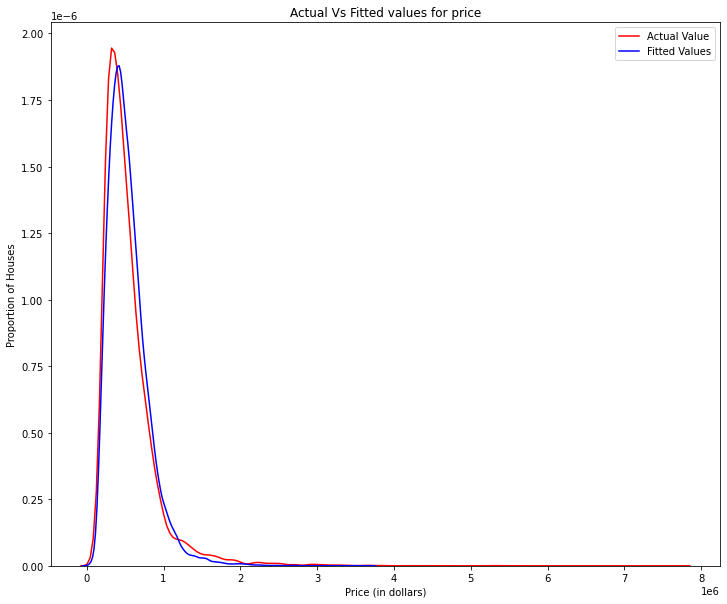

In [122]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat3, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual Vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap in most places.

<h3>4. removing zipcode(weak correlation and data are highly scattered) and muticollinearity vaeiables ('grade', 'sqft_above', 'sqft_living15)</h3>

In [123]:
Yhat4 = lm5.predict(Z4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


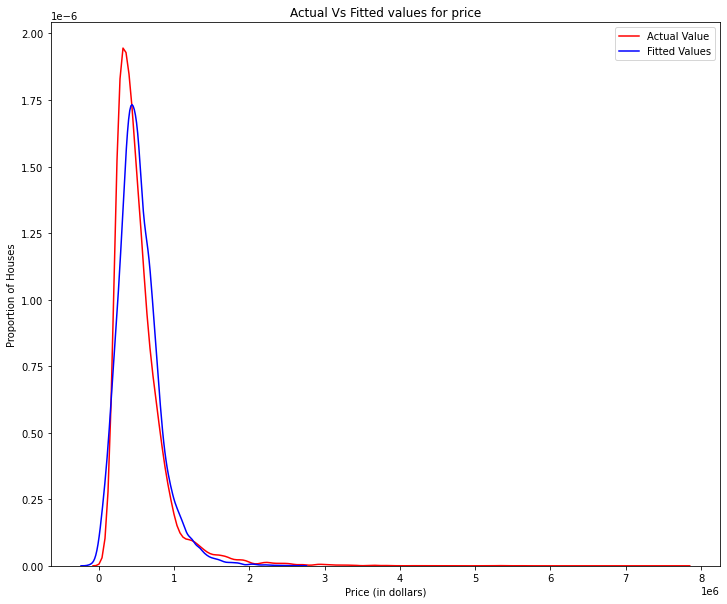

In [124]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat4, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual Vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap in most places.

# Measures the accuracy of the models

# 1. for Simple Linear Regression model

<h3>R-squared</h3>

In [125]:
lm1.score(X, Y)

0.4928532179037931

49.2853% of the variation of the price is explained by this simple linear regression model "sqft_living"

<h3>mean squared error (MSE)</h3>

predict the output

In [126]:
Yhat = lm1.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [287555.06702452 677621.82640197 172499.40418656 506441.44998452]


In [127]:
mse = mean_squared_error(data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  68351286833.039825


# 2. for Multiple Linear Regression model

<h3>R-squared</h3>

In [128]:
lm2.score(Z1,data['price'])

0.70172496913762

70.17250% of the variation of the price is explained by this multiple linear regression model

In [129]:
lm3.score(Z2,data['price'])

0.5779433989269844

57.7943% of the variation of the price is explained by this multiple linear regression model

In [130]:
lm4.score(Z3,data['price'])

0.5317266407255088

53.1726% of the variation of the price is explained by this multiple linear regression model

In [131]:
lm5.score(Z4,data['price'])

0.5928854561973973

59.2885% of the variation of the price is explained by this multiple linear regression model

<h3>mean squared error (MSE)</h3>

In [132]:
Yhat_multi_1 = lm2.predict(Z1)

In [133]:
mse_multi_1 = mean_squared_error(data['price'], Yhat_multi_1)
print('The mean square error of price and predicted value using Multiple Linear Regression model is: ', mse_multi_1)

The mean square error of price and predicted value using Multiple Linear Regression model is:  40200357981.84518


In [134]:
#----------

In [135]:
Yhat_multi_2 = lm3.predict(Z2)

In [136]:
Yhat_multi_2[0:5]

array([299733.87335347, 536265.88977622, 171299.72664485, 484466.25901036,
       488600.13350736])

In [137]:
mse_multi_2 = mean_squared_error(data['price'], Yhat_multi_2)
print('The mean square error of price and predicted value using Multiple Linear Regression model is: ', mse_multi_2)

The mean square error of price and predicted value using Multiple Linear Regression model is:  56883160493.45847


R-squared value of multiple linear regression model is highier than the simple linear regression model.

MSE value for multiple linear regression model is smaller than the  simple linear regression model.

therefore, multiple linear regression model is the most suitable model for this data.

In [138]:
Yhat_multi_3 = lm4.predict(Z3)

In [139]:
mse_multi_3 = mean_squared_error(data['price'], Yhat_multi_3)
print('The mean square error of price and predicted value using Multiple Linear Regression model is: ', mse_multi_3)

The mean square error of price and predicted value using Multiple Linear Regression model is:  63112076870.02546


In [140]:
Yhat_multi_4 = lm5.predict(Z4)

In [141]:
mse_multi_4 = mean_squared_error(data['price'], Yhat_multi_4)
print('The mean square error of price and predicted value using Multiple Linear Regression model is: ', mse_multi_4)

The mean square error of price and predicted value using Multiple Linear Regression model is:  54869327657.638664


In [142]:
#---------------

<h3> According to above R-squared values and MSE values and analysis of variables, lm5 multiple linear regreesion model is most appropriate. </h3>

price = -45640271.31744566 - 1.50689127e+05(long) - 3.61515289e+04(condition) - 1.80160121e+03(yr_built) - 2.37278789e-01(sqft_lot15) + 4.35778560e-01(sqft_lot) + 7.17245261e+04(renovated) + 6.96067800e+04(floors) + 6.26205953e+05(waterfront) + 6.38650405e+05(lat) + 6.76908399e+02(bedrooms) + 6.94276677e+01(sqft_basement) + 6.07485040e+04(view) + 1.33129229e+05(bathrooms) + 2.19335476e+02(sqft_living15)